In [16]:
%load_ext autoreload
%autoreload 2

from __future__ import annotations

# Add parent directory to path.
from pathlib import Path
import os
import sys
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/a/64438413
fdir = Path(os.path.abspath('')).resolve() # Directory of current file.
path = fdir/'..'
if path not in sys.path:
    sys.path.append(str(path))

# Complete imports.
import makassar_ml as ml
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import seaborn as sns
sns.set() # Use seaborn themes.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
def plot_lr(schedule, n_steps):
    steps = np.arange(n_steps)
    lrs = schedule(steps)
    plt.figure()
    plt.plot(steps, lrs)
    plt.xlabel('step')
    plt.ylabel('learning rate')

In [18]:
n_steps = 5_000

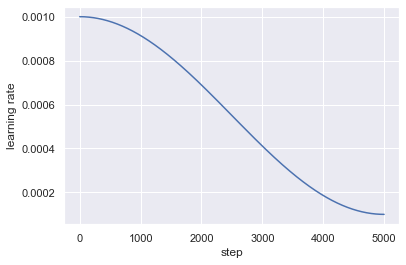

In [19]:
learning_rate = keras.experimental.CosineDecay(
    initial_learning_rate=1e-3,
    decay_steps=n_steps,
    alpha=0.1,
)
plot_lr(learning_rate, n_steps)

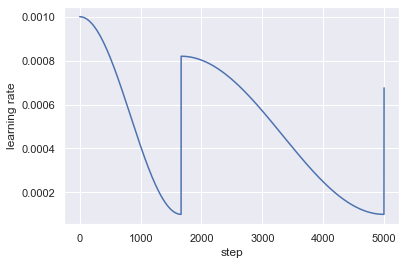

In [20]:
learning_rate = keras.experimental.CosineDecayRestarts(
    initial_learning_rate=1e-3,
    first_decay_steps=n_steps//3,
    m_mul=0.8,
    alpha=0.1,
)
plot_lr(learning_rate, n_steps)